In [34]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [35]:
# Load the CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [36]:
X_test.shape

(10000, 32, 32, 3)

In [37]:
Y_train.shape

(50000, 1)

In [38]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [39]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [40]:
Y_test = Y_test.reshape(-1,)

In [41]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [42]:
def plot_sample(X, Y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
    plt.show()

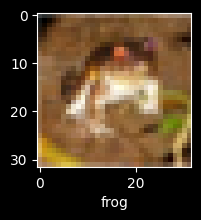

In [43]:
plot_sample(X_train, Y_train, 0)

In [44]:
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to [0, 1]

In [45]:
ann =  models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5)

/Users/nambanumben/Code/mtech/deep-learning/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1417 - loss: 23.2266
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1417 - loss: 23.2266
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1608 - loss: 19.0461
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1608 - loss: 19.0461
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1708 - loss: 19.1119
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1708 - loss: 19.1119
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.1667 - loss: 30.1894
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.1667 - loss: 30.1894
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1712 - loss: 34.5108
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1712 - loss: 34.5108


In [46]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:\n", classification_report(Y_test, y_pred_classes, target_names=classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.25      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.23      0.02      0.04      1000
        deer       0.00      0.00      0.00      1000
         dog       0.30      0.00      0.01      1000
        frog       0.13      0.95      0.24      1000
       horse       0.00      0.00      0.00      1000
        ship       0.29      0.32      0.30      1000
       truck       0.30      0.53      0.39      1000

    accuracy                           0.18     10000
   macro avg       0.15      0.18      0.10     10000
weighted avg       0.15      0.18      0.10     10000

Classification Report:
               precision    recall  f1-score   support

    airplane       0.25      0.00      0.00      1000
  

/Users/nambanumben/Code/mtech/deep-learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/nambanumben/Code/mtech/deep-learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/nambanumben/Code/mtech/deep-learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

<Figure size 800x600 with 0 Axes>

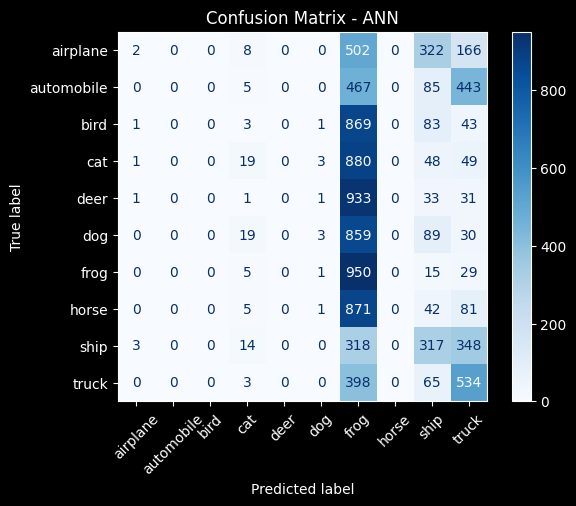

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_classes, display_labels=classes, cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix - ANN')
plt.show()

In [48]:
# Define the CNN model architecture 
cnn = models.Sequential([
    # First convolutional layer with 32 filters, followed by max pooling 
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer with 64 filters, followed by max pooling 
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the results to feed into a dense network 
    layers.Flatten(),
    # A dense layer with 64 neurons 
    layers.Dense(64, activation='relu'),
    # The output layer with 10 neurons for 10 classes 
    layers.Dense(10, activation='softmax')
])


/Users/nambanumben/Code/mtech/deep-learning/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compile the CNN model, specifying the optimizer, loss function, and metrics 
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:

# Train the model using the training data for 10 epochs 
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3694 - loss: 1.7190
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3694 - loss: 1.7190
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5746 - loss: 1.2034
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5746 - loss: 1.2034
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6223 - loss: 1.0864
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6234 - loss: 1.1162
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6154 - loss: 1.2129
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5775 - loss: 1.5856
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5284 - loss: 2.5979
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5030 - loss: 4.2494
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4623 - loss: 8.3898
Epoch 10/10

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4231 - loss: 23.6478 - val_accuracy: 0.3862 - val_loss: 37.1682
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4071 - loss: 36.3715 - val_accuracy: 0.4041 - val_loss: 46.4207
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3946 - loss: 54.2264 - val_accuracy: 0.4016 - val_loss: 62.7837
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3930 - loss: 74.0344 - val_accuracy: 0.3605 - val_loss: 97.1670
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3775 - loss: 103.4433 - val_accuracy: 0.3532 - val_loss: 157.4126
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3694 - loss: 147.1215 - val_accuracy: 0.3449 - val_loss: 196.1628
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3619 - loss: 197.4764 - val_accuracy: 0.3235 - val_loss: 243.4232
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step 

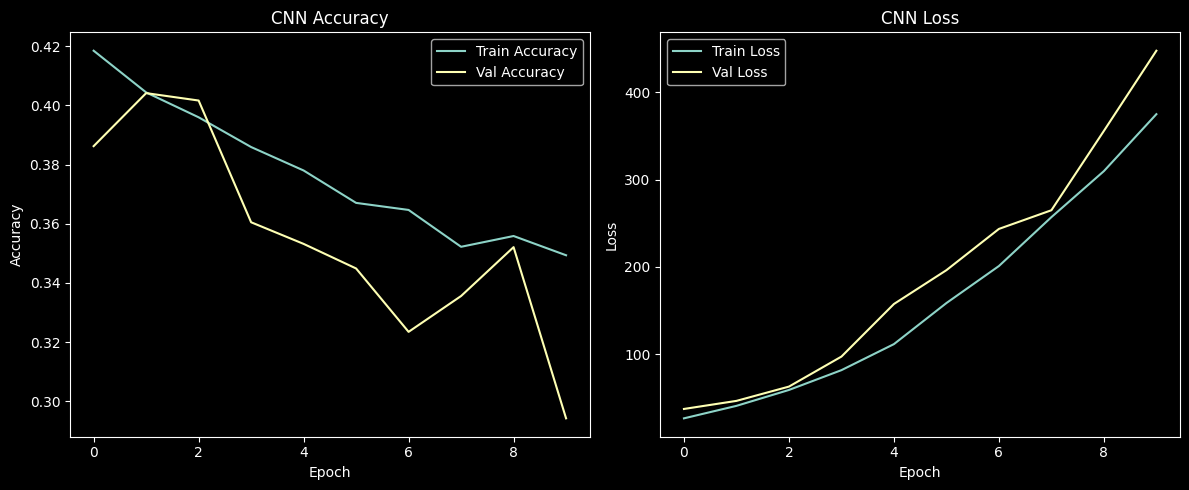

In [51]:
# If you want to visualize training history, store the fit result and plot accuracy/loss curves
cnn_history = cnn.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
# Evaluate the model's performance on the test dataset 
cnn.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2966 - loss: 448.1626


[447.5952453613281, 0.29429998993873596]

In [53]:
# Use the trained model to make predictions on the test data 
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.4598901e-29, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.6371568e-38, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [54]:
# Convert the prediction probabilities into class labels 
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 3]

<Figure size 800x600 with 0 Axes>

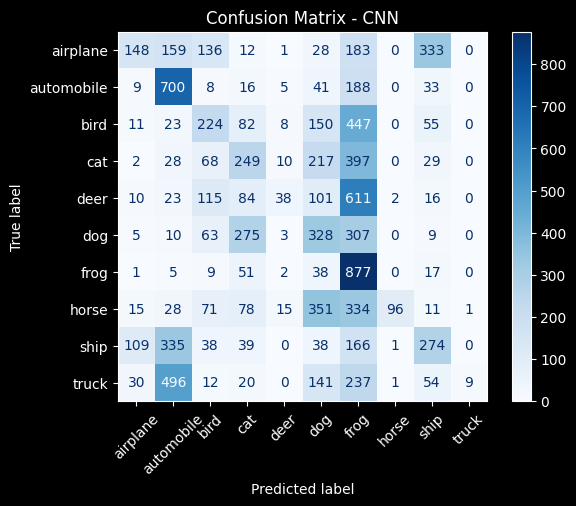

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(Y_test, y_classes, display_labels=classes, cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix - CNN')
plt.show()

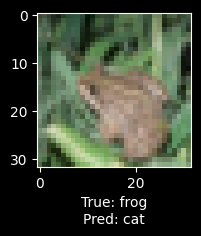

In [56]:
# Display a sample from the test set along with its predicted and true class
def plot_sample_with_pred(X, Y_true, Y_pred, index):
    plt.figure(figsize=(4,2))
    plt.imshow(X[index])
    plt.xlabel(f"True: {classes[Y_true[index]]}\nPred: {classes[Y_pred[index]]}")
    plt.show()

plot_sample_with_pred(X_test, Y_test, y_classes, 4)

In [57]:
classes[y_classes[3]]

'airplane'